<a href="https://colab.research.google.com/github/bsdivith/Linear-Regression/blob/main/life_satisfaction_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Life satisfaction prediction using linear regression. I assume life satisfaction is dependent on gdp per capita.

In [95]:
import pandas as pd
import numpy as np
import sklearn.linear_model

In [96]:
satisfaction_df = pd.read_csv("satisfaction.csv")

In [97]:
gdp_data = pd.read_csv("world_gdp_data.csv", encoding="latin-1", thousands= ",")

In [98]:
#gdp_data = gdp_data.drop(index=gdp_data.index[:4], inplace =True)


In [99]:
gdp_data.head()

,Country Name,2019
0,Aruba,31096.205070
1,Africa Eastern and Southern,1493.780445
2,Afghanistan,496.602504
3,Africa Western and Central,1783.654365
4,Angola,2189.855714


In [106]:
gdp_data = gdp_data.rename(columns={"Country Name": "Country"})


In [107]:
gdp_data.head()

,Country,2019
0,Aruba,31096.205070
1,Africa Eastern and Southern,1493.780445
2,Afghanistan,496.602504
3,Africa Western and Central,1783.654365
4,Angola,2189.855714


In [108]:
satisfaction_df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,...,2.3,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
1,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,...,2.4,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
2,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,...,3.8,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
3,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CZE,Czechia,JE_LMIS,Labour market insecurity,L,Value,...,2.3,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
4,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,...,4.5,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN


In [109]:
df_merged = pd.merge(satisfaction_df, gdp_data, on="Country")  # Joins where Country matches


In [110]:
df_merged.head(100)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,...,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period,2019
0,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,...,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN,49885.99474
1,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,...,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN,46716.62275
2,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,...,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN,46352.86934
3,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CZE,Czechia,JE_LMIS,Labour market insecurity,L,Value,...,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN,24062.71900
4,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,...,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN,59404.26632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUS,Australia,PS_FSAFEN,Feeling safe walking alone at night,L,Value,...,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN,54972.70179
96,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUT,Austria,PS_FSAFEN,Feeling safe walking alone at night,L,Value,...,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN,49885.99474
97,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,BEL,Belgium,PS_FSAFEN,Feeling safe walking alone at night,L,Value,...,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN,46716.62275
98,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CAN,Canada,PS_FSAFEN,Feeling safe walking alone at night,L,Value,...,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN,46352.86934


In [111]:
final_df = df_merged[["Country", "OBS_VALUE", "2019"]]

In [112]:
final_df.head()

,Country,OBS_VALUE,2019
0,Austria,2.3,49885.99474
1,Belgium,2.4,46716.62275
2,Canada,3.8,46352.86934
3,Czechia,2.3,24062.71900
4,Denmark,4.5,59404.26632


In [113]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    2144 non-null   object 
 1   OBS_VALUE  2144 non-null   float64
 2   2019       2144 non-null   float64
dtypes: float64(2), object(1)
memory usage: 50.4+ KB


In [114]:
final_df.loc[9]

,9
Country,Hungary
OBS_VALUE,3.8
2019,16786.21364


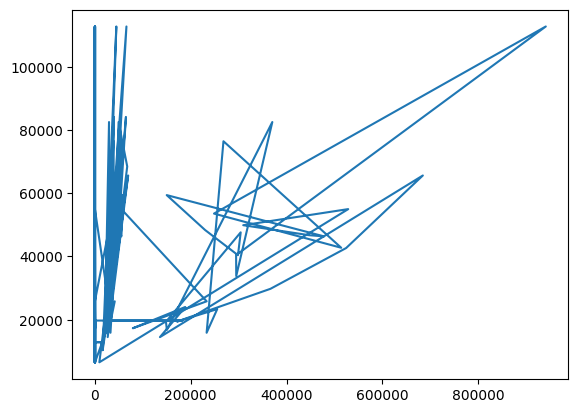

In [115]:
import matplotlib.pyplot as plt
plt.plot(final_df["OBS_VALUE"], final_df["2019"])

In [116]:

X = np.c_[final_df["2019"]]
y = np.c_[final_df["OBS_VALUE"]]


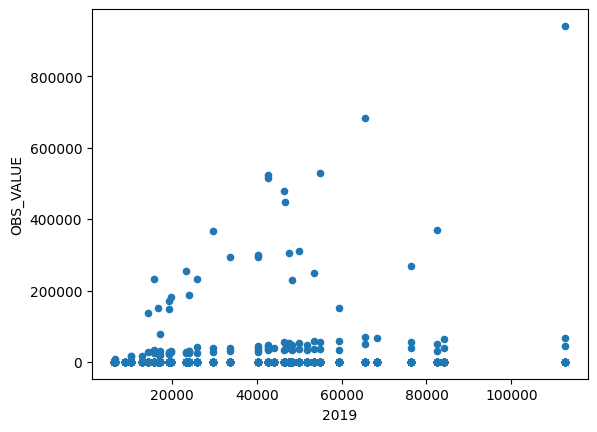

In [117]:
final_df.plot(kind='scatter', x="2019", y='OBS_VALUE')
plt.show()


In [118]:
model = sklearn.linear_model.LinearRegression()

In [122]:
model.fit(X,y)

LinearRegression()

In [125]:
X_new = [[22587]] # Cyprus's GDP
print(model.predict(X_new))

[[3746.02817171]]
